# Simple Text Data Analysis Using NLTK and SpaCy
Author: Alikhan Semembayev

## 0. Find the longest message from the data set.

In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv('../../../data/text/combined_raw.csv')

# Ensure the message column is a string
df['text'] = df['text'].astype(str)

# Calculate the length of each message
df['message_length'] = df['text'].apply(len)

# Find the row with the maximum message length
longest_message_row = df.loc[df['message_length'].idxmax()]

# Extract the longest message
longest_message = longest_message_row['text']
longest_message_length = longest_message_row['message_length']
longest_message_emotion = longest_message_row['emotion']

# Print the result
print(f"Longest message length: {longest_message_length}")
print(f"Longest message emotion: {longest_message_emotion}")
print(f"Longest message: {longest_message}")


Longest message length: 1159
Longest message emotion: angry
Longest message: Jacob , you have the luxury of having a haircut that rarely needs styling . I don ’ t . I have to set aside about an hour and a half to get ready in the mornings . Every day , I wake up and head straight for the shower . Every second day , I wash my hair . If it ’ s a hair-washing day , I frequently need to wash my hair twice because it gets really oily . Then I usually put in a conditioner and have to rinse that out too . Because my hair is so long , I seldom manage to take a shower in under twenty minutes . Afterwards , I often put on a pot of coffee and get dressed while I wait for it to brew . I take a long time to get dressed in the morning . Every now and then I remember to choose my outfit the night before , but usually I do it in the morning . In all , getting dressed takes about half an hour , at which time my hair is now semi-dry so then I have to style my hair . From time to time I ’ ll put my hair 

## 1. Tokenize the texts in the text files and save the result in a txt file. (10 points)

In [3]:
import nltk
from nltk.tokenize import word_tokenize
import os

nltk.download('punkt')
nltk.download('punkt_tab')

# Tokenize the text
tokens = word_tokenize(longest_message)

# Save tokens to a file
with open('tokens.txt', 'w') as file:
    file.write('\n'.join(tokens))

print(tokens)

['Jacob', ',', 'you', 'have', 'the', 'luxury', 'of', 'having', 'a', 'haircut', 'that', 'rarely', 'needs', 'styling', '.', 'I', 'don', '’', 't', '.', 'I', 'have', 'to', 'set', 'aside', 'about', 'an', 'hour', 'and', 'a', 'half', 'to', 'get', 'ready', 'in', 'the', 'mornings', '.', 'Every', 'day', ',', 'I', 'wake', 'up', 'and', 'head', 'straight', 'for', 'the', 'shower', '.', 'Every', 'second', 'day', ',', 'I', 'wash', 'my', 'hair', '.', 'If', 'it', '’', 's', 'a', 'hair-washing', 'day', ',', 'I', 'frequently', 'need', 'to', 'wash', 'my', 'hair', 'twice', 'because', 'it', 'gets', 'really', 'oily', '.', 'Then', 'I', 'usually', 'put', 'in', 'a', 'conditioner', 'and', 'have', 'to', 'rinse', 'that', 'out', 'too', '.', 'Because', 'my', 'hair', 'is', 'so', 'long', ',', 'I', 'seldom', 'manage', 'to', 'take', 'a', 'shower', 'in', 'under', 'twenty', 'minutes', '.', 'Afterwards', ',', 'I', 'often', 'put', 'on', 'a', 'pot', 'of', 'coffee', 'and', 'get', 'dressed', 'while', 'I', 'wait', 'for', 'it', 't

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\semem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\semem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## 2. Count word frequencies in the texts and save the result in a txt file.  (10 points)

In [4]:
from collections import Counter

# Count word frequencies
word_freq = Counter(tokens)

# Save word frequencies to a file
with open('word_frequencies.txt', 'w') as file:
    for word, freq in word_freq.items():
        file.write(f'{word}: {freq}\n')

print(word_freq)

Counter({'I': 17, '.': 16, ',': 13, 'to': 12, 'my': 9, 'the': 7, 'a': 7, 'hair': 7, 'it': 7, 'have': 6, 'and': 5, 'in': 5, 'of': 4, '’': 4, 'time': 4, 'that': 3, 'get': 3, 'Every': 3, 'day': 3, 'put': 3, 'so': 3, 'dressed': 3, 'then': 3, 'about': 2, 'an': 2, 'hour': 2, 'half': 2, 'up': 2, 'straight': 2, 'for': 2, 'shower': 2, 'wash': 2, 's': 2, 'because': 2, 'usually': 2, 'is': 2, 'long': 2, 'take': 2, 'twenty': 2, 'minutes': 2, 'morning': 2, 'now': 2, 'but': 2, 'Jacob': 1, 'you': 1, 'luxury': 1, 'having': 1, 'haircut': 1, 'rarely': 1, 'needs': 1, 'styling': 1, 'don': 1, 't': 1, 'set': 1, 'aside': 1, 'ready': 1, 'mornings': 1, 'wake': 1, 'head': 1, 'second': 1, 'If': 1, 'hair-washing': 1, 'frequently': 1, 'need': 1, 'twice': 1, 'gets': 1, 'really': 1, 'oily': 1, 'Then': 1, 'conditioner': 1, 'rinse': 1, 'out': 1, 'too': 1, 'Because': 1, 'seldom': 1, 'manage': 1, 'under': 1, 'Afterwards': 1, 'often': 1, 'on': 1, 'pot': 1, 'coffee': 1, 'while': 1, 'wait': 1, 'brew': 1, 'remember': 1, 'cho

## 3. Perform part-of-speech (POS) tagging on the tokenized words and save the result in a txt file.  (10 points)

In [5]:
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

# Perform POS tagging
pos_tags = nltk.pos_tag(tokens)

# Save POS tags to a file
with open('pos_tags.txt', 'w') as file:
    for word, tag in pos_tags:
        file.write(f'{word}: {tag}\n')

print(pos_tags)

[('Jacob', 'NNP'), (',', ','), ('you', 'PRP'), ('have', 'VBP'), ('the', 'DT'), ('luxury', 'NN'), ('of', 'IN'), ('having', 'VBG'), ('a', 'DT'), ('haircut', 'NN'), ('that', 'WDT'), ('rarely', 'RB'), ('needs', 'VBZ'), ('styling', 'NN'), ('.', '.'), ('I', 'PRP'), ('don', 'VBP'), ('’', 'JJ'), ('t', 'NN'), ('.', '.'), ('I', 'PRP'), ('have', 'VBP'), ('to', 'TO'), ('set', 'VB'), ('aside', 'RP'), ('about', 'IN'), ('an', 'DT'), ('hour', 'NN'), ('and', 'CC'), ('a', 'DT'), ('half', 'NN'), ('to', 'TO'), ('get', 'VB'), ('ready', 'JJ'), ('in', 'IN'), ('the', 'DT'), ('mornings', 'NNS'), ('.', '.'), ('Every', 'DT'), ('day', 'NN'), (',', ','), ('I', 'PRP'), ('wake', 'VBP'), ('up', 'RB'), ('and', 'CC'), ('head', 'VB'), ('straight', 'NN'), ('for', 'IN'), ('the', 'DT'), ('shower', 'NN'), ('.', '.'), ('Every', 'JJ'), ('second', 'JJ'), ('day', 'NN'), (',', ','), ('I', 'PRP'), ('wash', 'VBP'), ('my', 'PRP$'), ('hair', 'NN'), ('.', '.'), ('If', 'IN'), ('it', 'PRP'), ('’', 'VBZ'), ('s', 'PRP'), ('a', 'DT'), ('h

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\semem\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\semem\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


## 4. Perform named entity recognition (NER) on the texts and save the result in a txt file.  (10 points)

In [9]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('maxent_ne_chunker_tab')

# Perform NER
named_entities = nltk.chunk.ne_chunk(pos_tags)

# Save NER results to a file
with open('named_entities.txt', 'w') as file:
    for subtree in named_entities:
        if isinstance(subtree, nltk.Tree):
            print(subtree)
            file.write(f'{subtree.label()}: {" ".join([word for word, tag in subtree])}\n')

# print(named_entities)

(GPE Jacob/NNP)


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\semem\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\semem\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     C:\Users\semem\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!


## 5. Displaying the most frequent 10 words and save the result as an image file.  (20 points)

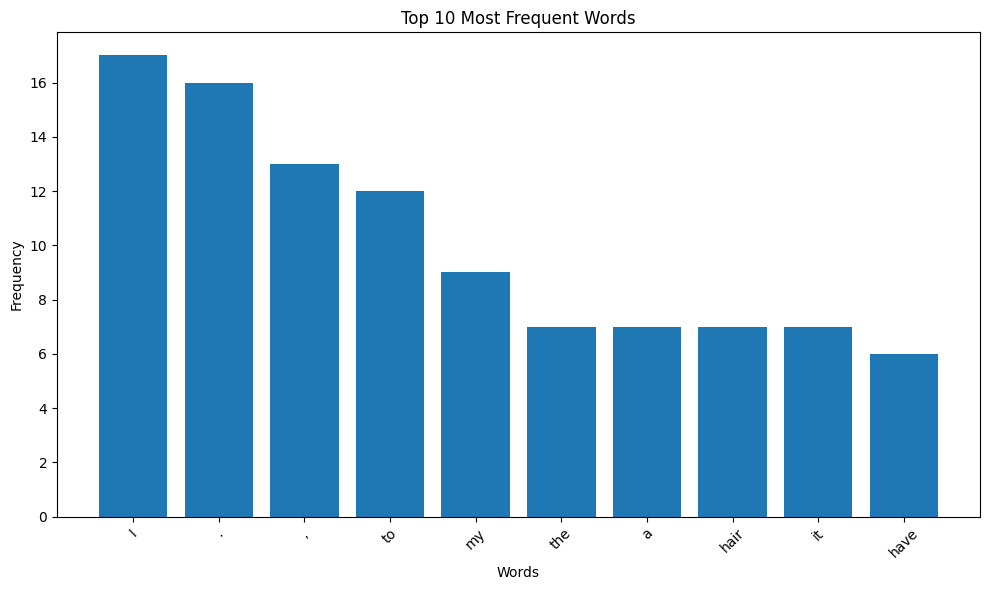

In [10]:
import matplotlib.pyplot as plt

# Get the most common 10 words
common_words = word_freq.most_common(10)
words, counts = zip(*common_words)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as an image file
plt.savefig('top_10_words.png')
plt.show()


## 6. Compute a word cloud from the word frequency distribution and save the result as an image file.  (20 points)

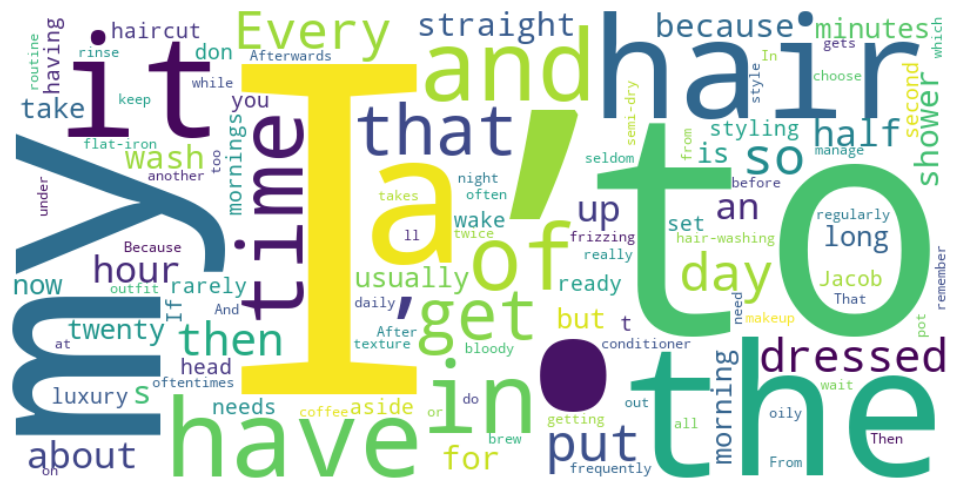

In [11]:
from wordcloud import WordCloud

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot and save the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()

plt.savefig('word_cloud.png')
plt.show()


## 7. Display the frequencies of the parts of speech and save the result as an image file.  (20 points)

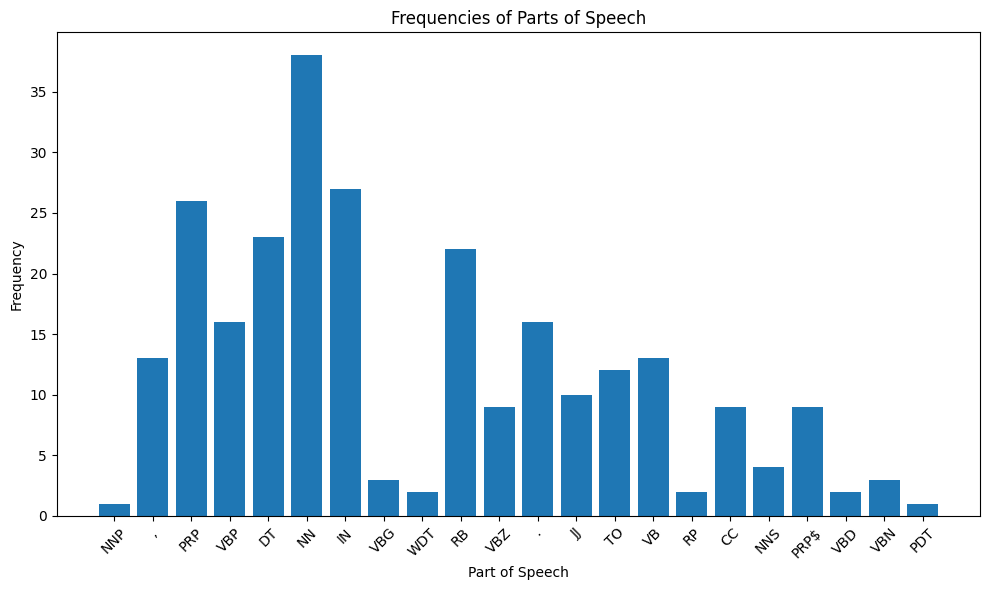

In [12]:
from collections import Counter

# Count POS frequencies
pos_freq = Counter(tag for word, tag in pos_tags)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(pos_freq.keys(), pos_freq.values())
plt.xlabel('Part of Speech')
plt.ylabel('Frequency')
plt.title('Frequencies of Parts of Speech')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as an image file
plt.savefig('pos_frequencies.png')
plt.show()
